In [1]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np
from sklearn.metrics import *
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import ttest_ind
import matplotlib

2024-07-08 01:10:43.440897: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
figb = pd.read_csv('./data/FigB_allinfos.csv')
# Convert to long format
long_df = pd.melt(figb, id_vars=["Model"], var_name="Cohort", value_name="AUC")
cohort_order = ["GSE4607","GSE8121", "GSE9692", "GSE13904",  "GSE26378", "GSE28750", "GSE185263", "Average"]
# 将 Cohort 列设置为分类类型，并指定类别顺序
long_df['Cohort'] = pd.Categorical(long_df['Cohort'], categories=cohort_order, ordered=True)
model_order = ["CaT","FAIM3/PLAC8","SeptiCyte","sNIP","K-Nearest Neighbors", "Decision Tree", "Random Forest",
         "Naive Bayes","Quadratic Discriminant Analysis"]
long_df['Model'] = pd.Categorical(long_df['Model'], categories=model_order, ordered=True)

long_df = long_df.sort_values(by=['Cohort', 'Model'])
long_df

,Model,Cohort,AUC
30,CaT,GSE4607,0.998556
27,FAIM3/PLAC8,GSE4607,0.984464
28,SeptiCyte,GSE4607,0.924623
29,sNIP,GSE4607,0.983447
31,K-Nearest Neighbors,GSE4607,0.985014
...,...,...,...
67,K-Nearest Neighbors,Average,0.879900
68,Decision Tree,Average,0.836732
69,Random Forest,Average,0.875626
70,Naive Bayes,Average,0.864895


In [5]:
def drawML2(roc2,file_train):
    cohorts = roc2['Cohort'].unique().tolist()
    model_names = roc2['Model'].unique().tolist()

    model_aucs = []
    for model in model_names:
        model_aucs.append(roc2[roc2['Model']==model]['AUC'].tolist())

    num_models = len(model_names)

    shift = num_models // 2 # the middle point to shift

    x = np.arange(len(cohorts))*4  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,5))

    model_axs = []
    colors = ['#9e2a2b','#897966', '#EAB69F',  '#8F5D5D','#3D405B', '#5F797B', '#81B29A', '#BABF95', '#F2CC8F']

    for i in range(num_models):
        model_axs.append(ax.bar(x + (i-shift)*width, model_aucs[i], width, label=model_names[i],color = colors[i]))
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUPRC Score',size=15)
    ax.set_title('AUPRC on microarray data',size=15)
    ax.set_xticks(x, cohorts,fontsize=14)
    ax.set_ylim(ymin=0.3,ymax=1.1)
    ax.legend()

    for model_ax in model_axs:
        ax.bar_label(model_ax, padding=-40, fmt='%.3f', rotation='vertical', size=13)

    plt.legend(loc='lower left',bbox_to_anchor = (0,-0.3), ncol=5,prop={'size':13})

    fig.tight_layout()
    plt.savefig('./'+file_train+'ML0613.png',dpi=100)

    plt.show()

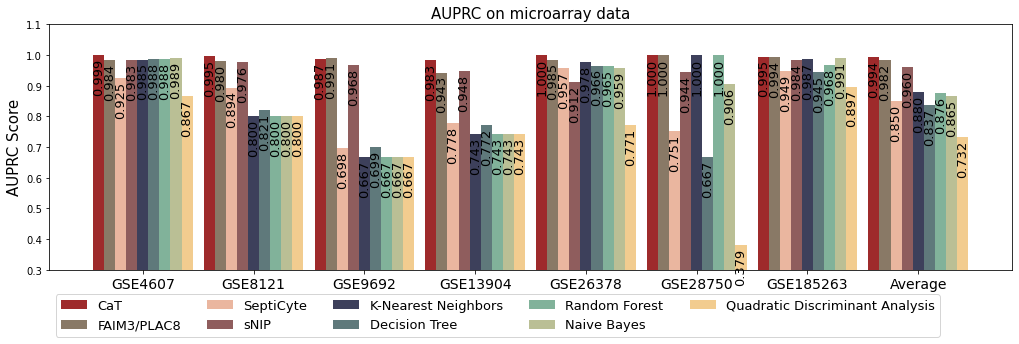

In [6]:
save_name = "newFigB"
drawML2(long_df,save_name)